**Prática de Realce e detecção de borda**

Exercícios retirados de:
http://homepages.inf.ed.ac.uk/rbf/HIPR2/featops.htm



In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

1) Aplique os filtros de realce Sobel e Roberts nas imagens abaixo. Mostre, para o caso do Sobel, uma imagem representando a derivada em x e outra imagem representando a derivada em y

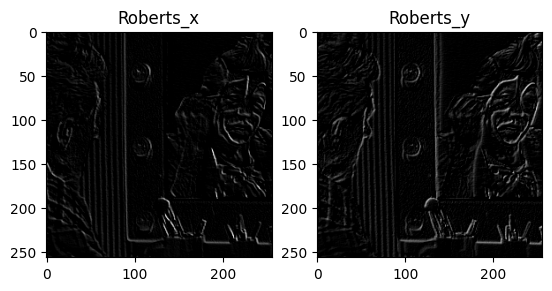

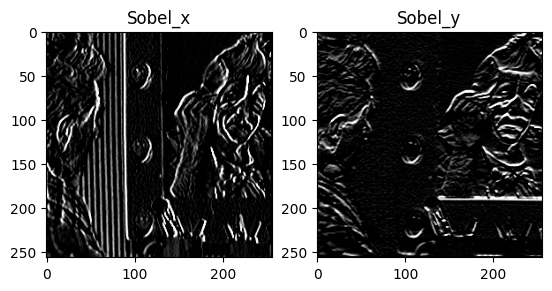

In [16]:
# code here
img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)


# Aplicar filtro Roberts
Roberts_x = np.array([[0, 1],[ -1, 0]])
Roberts_y = np.array([[ 1, 0],[ 0, -1]])


imgr_x = cv2.filter2D(img1, -1, Roberts_x)
imgr_y = cv2.filter2D(img1, -1, Roberts_y)

# Mostrar imagens resultantes 
plt.subplot(1, 2, 1), plt.imshow(imgr_x, cmap='gray')
plt.title('Roberts_x'),
plt.subplot(1, 2, 2), plt.imshow(imgr_y, cmap='gray')
plt.title('Roberts_y'),
plt.show()


# Aplicar filtro Sobel
Sobel_x = np.array([[-1, 0, 1],[-2, 0, 2],[-1, 0, 1]])
Sobel_y = np.array([[-1, -2, -1],[0, 0, 0],[1, 2, 1]])

imgs_x = cv2.filter2D(img1, -1, Sobel_x)
imgs_y = cv2.filter2D(img1, -1, Sobel_y)

# Mostrar imagens resultantes
plt.subplot(1, 2, 1), plt.imshow(imgs_x, cmap='gray')
plt.title('Sobel_x'),
plt.subplot(1, 2, 2), plt.imshow(imgs_y, cmap='gray')
plt.title('Sobel_y'),
plt.show()

2) Utilizando a imagem do exercício anterior, realce as bordas utilizando (a) Filtro Laplaciano. (b) Unsharp masking. (c) Highboost filtering (escolher um k). (d) K <1 para atenuar

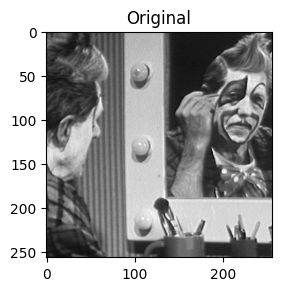

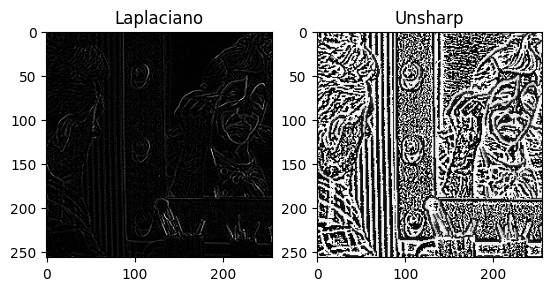

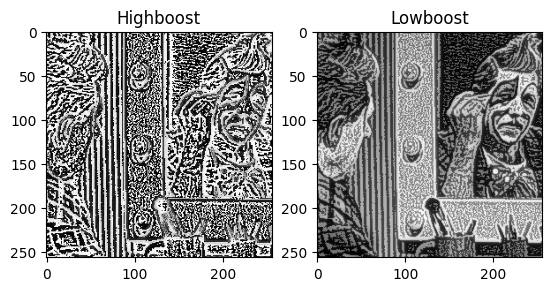

In [16]:
# code here

img1 = cv2.imread("cln1.png", cv2.IMREAD_GRAYSCALE)

#a
# Definindo a máscara laplaciana
laplacian_mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

# Aplicando a convolução com a máscara
laplacian = cv2.filter2D(img1, -1, laplacian_mask)

#b
# Aplicando filtro gaussiano para suavizar a imagem
kernel = np.ones((5,5),np.float32)/25
blur = cv2.filter2D(img1,-1,kernel)

# Gerando a unsharp
unsharp = img1 - blur

#c
# Definindo o valor de k
k = 2

# Aplicando filtro gaussiano para suavizar a imagem
kernel = np.ones((5,5),np.float32)/25
blur = cv2.filter2D(img1,-1,kernel)

# Calculando a imagem de alta frequência
highboost = k * (img1 - blur)

#d
# Definindo o valor de k
k = 0.5

# Aplicando filtro gaussiano para suavizar a imagem
kernel = np.ones((5,5),np.float32)/25
blur = cv2.filter2D(img1,-1,kernel)

# Calculando a imagem de baixa frequência
lowboost = img1 + k * (blur - img1)


# Mostrar imagens resultantes

plt.subplot(1, 2, 1), plt.imshow(img1, cmap='gray')
plt.title('Original'),
plt.show()
plt.subplot(1, 2, 1), plt.imshow(laplacian, cmap='gray')
plt.title('Laplaciano'),
plt.subplot(1, 2, 2), plt.imshow(unsharp, cmap='gray')
plt.title('Unsharp'),
plt.show()
plt.subplot(1, 2, 1), plt.imshow(highboost, cmap='gray')
plt.title('Highboost'),
plt.subplot(1, 2, 2), plt.imshow(lowboost, cmap='gray')
plt.title('Lowboost'),
plt.show()

3) Aplique o operador Sobel imagem original abaixo e obtenha as outras imagens conforme descrição. We can see that the intensity of many pixels on the surface is as high as along the actual edges. One reason is that the output of many edge pixels is greater than the maximum pixel value and therefore they are `cut off' at 255. To avoid this overflow we scale the range image by a factor 0.25 prior to the edge detection and then normalize the output, as can be seen in (c)

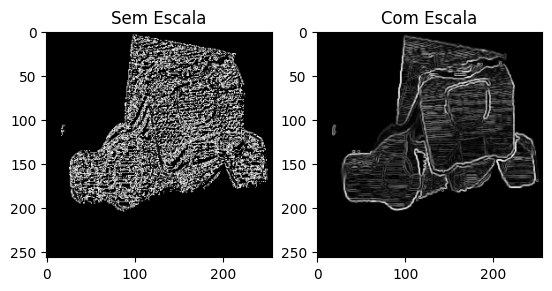

In [57]:
#code here
import cv2
import numpy as np

def normalize_image(img):
    img_min = np.min(img)
    img_max = np.max(img)
    img_normalized = (img - img_min) / (img_max - img_min) * 255
    return img_normalized.astype(np.uint8)


# Carrega a imagem original em escala de cinza
img = cv2.imread('ren1.png',cv2.IMREAD_GRAYSCALE)

#Definir as máscaras Sobel para detecção de bordas
Sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

#Aplicar as máscaras de Sobel para calcular as derivadas nas direções x e y
img_x1 = cv2.filter2D(img, -1, Sobel_x)
img_y1 = cv2.filter2D(img, -1, Sobel_y)

#Calcular a magnitude das bordas
mag = np.sqrt(img_x1**2 + img_y1**2)

#scaled
img = img*0.25

#Aplicar as máscaras de Sobel para calcular as derivadas nas direções x e y
img_x = cv2.filter2D(img, -1, Sobel_x)
img_y = cv2.filter2D(img, -1, Sobel_y)

#Calcular a magnitude das bordas
mag2= np.sqrt(img_x**2 + img_y**2)
mag2=normalize_image(mag2)

# Mostra as imagens resultantes
plt.subplot(1, 2, 1), plt.imshow(mag, cmap='gray')
plt.title('Sem Escala')
plt.subplot(1, 2, 2), plt.imshow(mag2, cmap='gray')
plt.title('Com Escala')
plt.show()


4) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

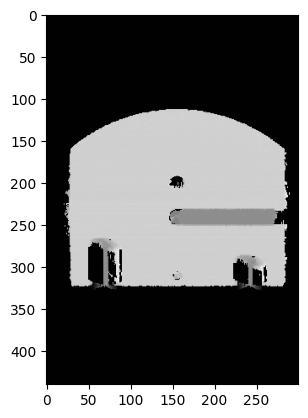

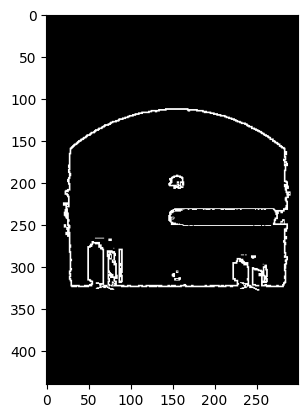

In [47]:

#code here
#Carregar a imagem original em escala de cinza
img1 = cv2.imread('ufo2.png', cv2.IMREAD_GRAYSCALE)
plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.show()

#Definir as máscaras Sobel para detecção de bordas
Sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

#Aplicar as máscaras de Sobel para calcular as derivadas nas direções x e y
img_x = cv2.filter2D(img1, cv2.CV_64F, Sobel_x)
img_y = cv2.filter2D(img1, cv2.CV_64F, Sobel_y)

#Calcular a magnitude das bordas
mag = np.sqrt(img_x**2 + img_y**2)

#Limiarizar a imagem resultante
thresh = 150
binary = np.uint8(mag > thresh)

# Mostra as imagens resultantes
plt.imshow(binary, cmap='gray')
plt.show()

5) Aplique o operador Sobel imagem original abaixo e obtenha a imagem binária após a limiarização utilizando o valor 150

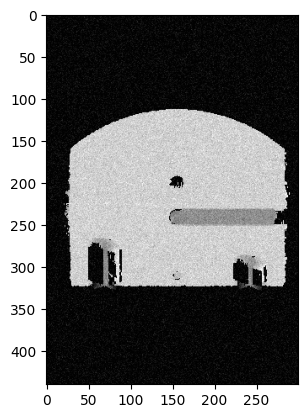

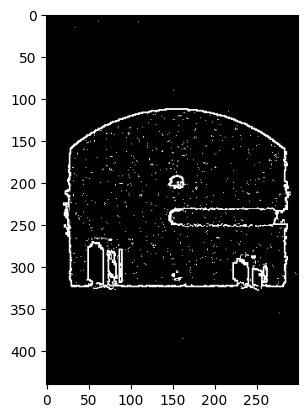

In [18]:
#code here

#code here
img1 = cv2.imread("ufo2noi2.png", cv2.IMREAD_GRAYSCALE)

plt.imshow(img1, cmap='gray', vmin=0, vmax=255)
plt.show()

img = cv2.imread('ufo2noi2.png', cv2.IMREAD_GRAYSCALE)

#Definir as máscaras Sobel para detecção de bordas
Sobel_x = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Sobel_y = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

#Aplicar as máscaras de Sobel para calcular as derivadas nas direções x e y
img_x = cv2.filter2D(img1, cv2.CV_64F, Sobel_x)
img_y = cv2.filter2D(img1, cv2.CV_64F, Sobel_y)

#Calcular a magnitude das bordas
mag = np.sqrt(img_x**2 + img_y**2)

#Limiarizar a imagem resultante
thresh = 150
binary = np.uint8(mag > thresh)

# Mostra as imagens resultantes
plt.imshow(binary, cmap='gray')
plt.show()